In [15]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from sklearn.svm import LinearSVC, SVC
df = pd.read_csv("train_bank_marketing.csv")
job = {"admin.":1,"blue-collar":2,"entrepreneur":3,
       "housemaid":4,"management":5,"retired":6,
       "self-employed":7,"services":8,"student":9,
       "technician":10,"unemployed":11,"unknown":0}

civil = {"divorced":1,"married":2,"single":3,"unknown":0}

educ = {"basic.4y":1,"basic.6y":2,"basic.9y":3,
        "high.school":4,"illiterate":5,"professional.course":6,
        "university.degree":7,"unknown":0}

binary = {"no":0,"yes":1,"unknown":1}

contact = {"cellular":0,"telephone":1}

month = {'jan': 1,
        'feb': 2,
        'mar': 3,
        'apr': 4,
        'may': 5,
        'jun': 6,
        'jul': 7,
        'aug': 8,
        'sep': 9,
        'oct': 10,
        'nov': 11,
        'dec': 12}

day = {"mon":1,"tue":2,"wed":3,"thu":4,"fri":5}
poutcome = {"failure":0,"nonexistent":1,"success":2}
df['job'] = df['job'].apply(lambda x: job[x])
df['marital'] = df['marital'].apply(lambda x: civil[x])
df['education'] = df['education'].apply(lambda x: educ[x])
df['default'] = df['default'].apply(lambda x: binary[x])
df['housing'] = df['housing'].apply(lambda x: binary[x])
df['loan'] = df['loan'].apply(lambda x: binary[x])
df['contact'] = df['contact'].apply(lambda x: contact[x])
df['month'] = df['month'].apply(lambda x: month[x])
df['day_of_week'] = df['day_of_week'].apply(lambda x: day[x])
df['poutcome'] = df['poutcome'].apply(lambda x: poutcome[x])
grouped_df = df.groupby('job')
 
df[['emp_mean', 'price_mean', 'conf_mean', 'euri_mean', 'nremp_mean']] = grouped_df[['emp.var.rate',  'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']].transform('mean')
 
df[['emp_std', 'price_std', 'conf_std', 'euri_std', 'nremp_std']] = grouped_df[['emp.var.rate',  'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']].transform('std')
 
df[['emp_count', 'price_count', 'conf_count', 'euri_count', 'nremp_count']] = grouped_df[['emp.var.rate',  'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']].transform('count')
X = df[df.columns.drop(['y'])]
y = df['y']

In [16]:
test = pd.read_csv('test_bank_marketing.csv')
day = {"mon":1,"tue":2,"wed":3,"thu":4,"fri":5}
poutcome = {"failure":0,"nonexistent":1,"success":2}
test['job'] = test['job'].apply(lambda x: job[x])
test['marital'] = test['marital'].apply(lambda x: civil[x])
test['education'] = test['education'].apply(lambda x: educ[x])
test['default'] = test['default'].apply(lambda x: binary[x])
test['housing'] = test['housing'].apply(lambda x: binary[x])
test['loan'] = test['loan'].apply(lambda x: binary[x])
test['contact'] = test['contact'].apply(lambda x: contact[x])
test['month'] = test['month'].apply(lambda x: month[x])
test['day_of_week'] = test['day_of_week'].apply(lambda x: day[x])
test['poutcome'] = test['poutcome'].apply(lambda x: poutcome[x])
grouped_test = test.groupby('job')
 
test[['emp_mean', 'price_mean', 'conf_mean', 'euri_mean', 'nremp_mean']] = grouped_test[['emp.var.rate',  'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']].transform('mean')
 
test[['emp_std', 'price_std', 'conf_std', 'euri_std', 'nremp_std']] = grouped_test[['emp.var.rate',  'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']].transform('std')
 
test[['emp_count', 'price_count', 'conf_count', 'euri_count', 'nremp_count']] = grouped_test[['emp.var.rate',  'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']].transform('count')

In [4]:
from sklearn.neighbors import KNeighborsClassifier
iterations = 10
k_params = list(range(2, 10))
knn_accuracy = {}

for k in tqdm(k_params):
    train_acc_list = []
    test_acc_list = []
    
    for seed in range(iterations):
        X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                            test_size=0.2, 
                                                            random_state=seed,
                                                            stratify=y)

        knn_model = KNeighborsClassifier(n_neighbors=k)
        knn_model.fit(X_train, y_train)
    
        train_acc_list.append(knn_model.score(X_train, y_train))
        test_acc_list.append(knn_model.score(X_test, y_test))
    
    knn_accuracy[str(k)] = {'train_acc': np.mean(train_acc_list),
                            'test_acc': np.mean(test_acc_list)}

  0%|          | 0/8 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KeyboardInterrupt: 

In [5]:
knn_accuracy

{'2': {'train_acc': 0.9423761735189384, 'test_acc': 0.8962453471435508},
 '3': {'train_acc': 0.9411014891550662, 'test_acc': 0.8991584398770026}}

In [2]:
X1=X.to_numpy()
y1=y.to_numpy()

In [14]:
X1=X.to_numpy()
y1=y.to_numpy()
C_params = (1e-4, 0.001, 1e-2, 0.1, 1, 10, 100, 1000)#regularization parameter
kf = KFold(n_splits=5)
ridge1_accuracy = {}
for C in tqdm(C_params):
    train_acc_list=[]
    test_acc_list=[]
    for train_index, test_index in kf.split(X1):
        print(train_index, test_index)
        X_train, X_test = X1[train_index], X1[test_index]
        y_train, y_test = y1[train_index], y1[test_index]
        ridge_model = LogisticRegression(penalty= 'l2', C=C, solver='saga',
                                        max_iter=10000000, n_jobs=-1)
        ridge_model.fit(X_train,y_train)
        train_acc_list.append(ridge_model.score(X_train, y_train))
        test_acc_list.append(ridge_model.score(X_test, y_test))
    ridge1_accuracy[str(C)] ={'train_acc' : np.mean(train_acc_list),
                            'test_acc' : np.mean(test_acc_list)}

<IPython.core.display.Javascript object>

  0%|          | 0/8 [00:00<?, ?it/s]

[ 6179  6180  6181 ... 30888 30889 30890] [   0    1    2 ... 6176 6177 6178]


<IPython.core.display.Javascript object>

[    0     1     2 ... 30888 30889 30890] [ 6179  6180  6181 ... 12354 12355 12356]


<IPython.core.display.Javascript object>

[    0     1     2 ... 30888 30889 30890] [12357 12358 12359 ... 18532 18533 18534]


<IPython.core.display.Javascript object>

[    0     1     2 ... 30888 30889 30890] [18535 18536 18537 ... 24710 24711 24712]


<IPython.core.display.Javascript object>

[    0     1     2 ... 24710 24711 24712] [24713 24714 24715 ... 30888 30889 30890]


<IPython.core.display.Javascript object>

[ 6179  6180  6181 ... 30888 30889 30890] [   0    1    2 ... 6176 6177 6178]


<IPython.core.display.Javascript object>

[    0     1     2 ... 30888 30889 30890] [ 6179  6180  6181 ... 12354 12355 12356]


<IPython.core.display.Javascript object>

[    0     1     2 ... 30888 30889 30890] [12357 12358 12359 ... 18532 18533 18534]


<IPython.core.display.Javascript object>

[    0     1     2 ... 30888 30889 30890] [18535 18536 18537 ... 24710 24711 24712]


<IPython.core.display.Javascript object>

[    0     1     2 ... 24710 24711 24712] [24713 24714 24715 ... 30888 30889 30890]


<IPython.core.display.Javascript object>

[ 6179  6180  6181 ... 30888 30889 30890] [   0    1    2 ... 6176 6177 6178]


<IPython.core.display.Javascript object>

[    0     1     2 ... 30888 30889 30890] [ 6179  6180  6181 ... 12354 12355 12356]


<IPython.core.display.Javascript object>

[    0     1     2 ... 30888 30889 30890] [12357 12358 12359 ... 18532 18533 18534]


<IPython.core.display.Javascript object>

[    0     1     2 ... 30888 30889 30890] [18535 18536 18537 ... 24710 24711 24712]


<IPython.core.display.Javascript object>

[    0     1     2 ... 24710 24711 24712] [24713 24714 24715 ... 30888 30889 30890]


<IPython.core.display.Javascript object>

[ 6179  6180  6181 ... 30888 30889 30890] [   0    1    2 ... 6176 6177 6178]


<IPython.core.display.Javascript object>

[    0     1     2 ... 30888 30889 30890] [ 6179  6180  6181 ... 12354 12355 12356]


<IPython.core.display.Javascript object>

[    0     1     2 ... 30888 30889 30890] [12357 12358 12359 ... 18532 18533 18534]


<IPython.core.display.Javascript object>

[    0     1     2 ... 30888 30889 30890] [18535 18536 18537 ... 24710 24711 24712]


<IPython.core.display.Javascript object>

[    0     1     2 ... 24710 24711 24712] [24713 24714 24715 ... 30888 30889 30890]


<IPython.core.display.Javascript object>

[ 6179  6180  6181 ... 30888 30889 30890] [   0    1    2 ... 6176 6177 6178]


<IPython.core.display.Javascript object>

[    0     1     2 ... 30888 30889 30890] [ 6179  6180  6181 ... 12354 12355 12356]


<IPython.core.display.Javascript object>

[    0     1     2 ... 30888 30889 30890] [12357 12358 12359 ... 18532 18533 18534]


<IPython.core.display.Javascript object>

[    0     1     2 ... 30888 30889 30890] [18535 18536 18537 ... 24710 24711 24712]


<IPython.core.display.Javascript object>

[    0     1     2 ... 24710 24711 24712] [24713 24714 24715 ... 30888 30889 30890]


<IPython.core.display.Javascript object>

[ 6179  6180  6181 ... 30888 30889 30890] [   0    1    2 ... 6176 6177 6178]


<IPython.core.display.Javascript object>

[    0     1     2 ... 30888 30889 30890] [ 6179  6180  6181 ... 12354 12355 12356]


<IPython.core.display.Javascript object>

[    0     1     2 ... 30888 30889 30890] [12357 12358 12359 ... 18532 18533 18534]


<IPython.core.display.Javascript object>

[    0     1     2 ... 30888 30889 30890] [18535 18536 18537 ... 24710 24711 24712]


<IPython.core.display.Javascript object>

[    0     1     2 ... 24710 24711 24712] [24713 24714 24715 ... 30888 30889 30890]


<IPython.core.display.Javascript object>

[ 6179  6180  6181 ... 30888 30889 30890] [   0    1    2 ... 6176 6177 6178]


<IPython.core.display.Javascript object>

[    0     1     2 ... 30888 30889 30890] [ 6179  6180  6181 ... 12354 12355 12356]


<IPython.core.display.Javascript object>

[    0     1     2 ... 30888 30889 30890] [12357 12358 12359 ... 18532 18533 18534]


<IPython.core.display.Javascript object>

[    0     1     2 ... 30888 30889 30890] [18535 18536 18537 ... 24710 24711 24712]


<IPython.core.display.Javascript object>

[    0     1     2 ... 24710 24711 24712] [24713 24714 24715 ... 30888 30889 30890]


<IPython.core.display.Javascript object>

[ 6179  6180  6181 ... 30888 30889 30890] [   0    1    2 ... 6176 6177 6178]


<IPython.core.display.Javascript object>

[    0     1     2 ... 30888 30889 30890] [ 6179  6180  6181 ... 12354 12355 12356]


<IPython.core.display.Javascript object>

[    0     1     2 ... 30888 30889 30890] [12357 12358 12359 ... 18532 18533 18534]


<IPython.core.display.Javascript object>

[    0     1     2 ... 30888 30889 30890] [18535 18536 18537 ... 24710 24711 24712]


<IPython.core.display.Javascript object>

[    0     1     2 ... 24710 24711 24712] [24713 24714 24715 ... 30888 30889 30890]


<IPython.core.display.Javascript object>

In [48]:
ra = pd.DataFrame(ridge1_accuracy).T
print(ra['test_acc'].idxmax())

0.01


In [67]:
#Unstratified kfold GBC
from sklearn.model_selection import KFold
max_features_params = [0.5, 0.6, 0.7, 0.8]
gbm_accuracy1 = {}
kf = KFold(n_splits=5)
for mf in tqdm(max_features_params):
    train_acc_list=[]
    test_acc_list=[]
    for train_index, test_index in kf.split(X1):
        print(train_index, test_index)
        X_train, X_test = X1[train_index], X1[test_index]
        y_train, y_test = y1[train_index], y1[test_index]
        gbm_model = GradientBoostingClassifier(max_features=mf,max_depth=5)
        gbm_model.fit(X_train,y_train)
        train_acc_list.append(gbm_model.score(X_train, y_train))
        test_acc_list.append(gbm_model.score(X_test, y_test))
    gbm_accuracy1[str(mf)] ={'train_acc' : np.mean(train_acc_list),
                            'test_acc' : np.mean(test_acc_list)}

  0%|          | 0/4 [00:00<?, ?it/s]

[ 6179  6180  6181 ... 30888 30889 30890] [   0    1    2 ... 6176 6177 6178]


<IPython.core.display.Javascript object>

[    0     1     2 ... 30888 30889 30890] [ 6179  6180  6181 ... 12354 12355 12356]


<IPython.core.display.Javascript object>

[    0     1     2 ... 30888 30889 30890] [12357 12358 12359 ... 18532 18533 18534]


<IPython.core.display.Javascript object>

[    0     1     2 ... 30888 30889 30890] [18535 18536 18537 ... 24710 24711 24712]


<IPython.core.display.Javascript object>

[    0     1     2 ... 24710 24711 24712] [24713 24714 24715 ... 30888 30889 30890]


<IPython.core.display.Javascript object>

[ 6179  6180  6181 ... 30888 30889 30890] [   0    1    2 ... 6176 6177 6178]


<IPython.core.display.Javascript object>

[    0     1     2 ... 30888 30889 30890] [ 6179  6180  6181 ... 12354 12355 12356]


<IPython.core.display.Javascript object>

[    0     1     2 ... 30888 30889 30890] [12357 12358 12359 ... 18532 18533 18534]


<IPython.core.display.Javascript object>

[    0     1     2 ... 30888 30889 30890] [18535 18536 18537 ... 24710 24711 24712]


<IPython.core.display.Javascript object>

[    0     1     2 ... 24710 24711 24712] [24713 24714 24715 ... 30888 30889 30890]


<IPython.core.display.Javascript object>

[ 6179  6180  6181 ... 30888 30889 30890] [   0    1    2 ... 6176 6177 6178]


<IPython.core.display.Javascript object>

[    0     1     2 ... 30888 30889 30890] [ 6179  6180  6181 ... 12354 12355 12356]


<IPython.core.display.Javascript object>

[    0     1     2 ... 30888 30889 30890] [12357 12358 12359 ... 18532 18533 18534]


<IPython.core.display.Javascript object>

[    0     1     2 ... 30888 30889 30890] [18535 18536 18537 ... 24710 24711 24712]


<IPython.core.display.Javascript object>

[    0     1     2 ... 24710 24711 24712] [24713 24714 24715 ... 30888 30889 30890]


<IPython.core.display.Javascript object>

[ 6179  6180  6181 ... 30888 30889 30890] [   0    1    2 ... 6176 6177 6178]


<IPython.core.display.Javascript object>

[    0     1     2 ... 30888 30889 30890] [ 6179  6180  6181 ... 12354 12355 12356]


<IPython.core.display.Javascript object>

[    0     1     2 ... 30888 30889 30890] [12357 12358 12359 ... 18532 18533 18534]


<IPython.core.display.Javascript object>

[    0     1     2 ... 30888 30889 30890] [18535 18536 18537 ... 24710 24711 24712]


<IPython.core.display.Javascript object>

[    0     1     2 ... 24710 24711 24712] [24713 24714 24715 ... 30888 30889 30890]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

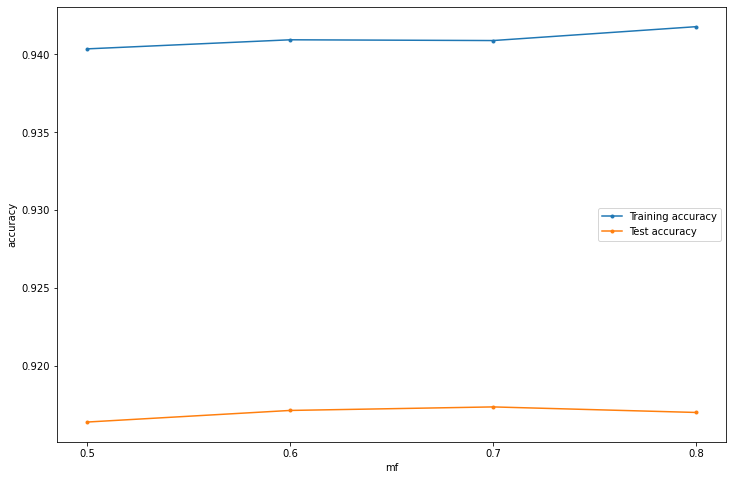

0.7


In [68]:
ga = pd.DataFrame(gbm_accuracy1).T
plt.figure(figsize=(12, 8))
plt.plot(ga.index, ga['train_acc'], label='Training accuracy', marker='.')
plt.plot(ga.index, ga['test_acc'], label='Test accuracy', marker='.')
plt.legend()
plt.xlabel('mf')
plt.ylabel('accuracy')
plt.show()
print(ga['test_acc'].idxmax())


In [69]:
gbm_accuracy1

{'0.5': {'train_acc': 0.94035480144693, 'test_acc': 0.9163835872828378},
 '0.6': {'train_acc': 0.9409374917022489, 'test_acc': 0.9171280914674025},
 '0.7': {'train_acc': 0.9408889257481323, 'test_acc': 0.9173546496291101},
 '0.8': {'train_acc': 0.9417791575876363, 'test_acc': 0.9169985997225012}}

In [63]:
#GradientBoostingClassifier Gridsearch
import time
from sklearn.model_selection import GridSearchCV

max_features=[0.5, 0.6, 0.7, 0.8]
max_depth=list(range(10))

param_grid = dict(max_features=max_features,max_depth=max_depth)


_model = GradientBoostingClassifier()
grid = GridSearchCV(estimator=_model, param_grid=param_grid, cv = 5, n_jobs=-1)

start_time = time.time()
grid_result = grid.fit(X, y)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

<IPython.core.display.Javascript object>

C:\Users\kvray\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan 0.90832284 0.90829046
 0.90829047 0.90838756 0.91343771 0.91421462 0.91398802 0.91389092
 0.9166749  0.91673967 0.91712812 0.91751659 0.917031   0.91758137
 0.91641589 0.9166749  0.91696623 0.91673963 0.91706334 0.91680437
 0.91683672 0.91661012 0.9161569  0.91680427 0.91628634 0.91466781
 0.91554179 0.91554179 0.91550943 0.91405269 0.91350235 0.91343764
 0.91330821 0.91340528 0.91350236 0.91343759]
  warnings.warn(


Best: 0.917581 using {'max_depth': 4, 'max_features': 0.6}
Execution time: 76.2959942817688 ms


In [70]:
from sklearn.model_selection import StratifiedKFold
#Stratified kfold
max_features_params = [0.5, 0.6, 0.7, 0.8]
gbm_accuracy2 = {}
kf = StratifiedKFold(n_splits=5)

for mf in tqdm(max_features_params):
    train_acc_list=[]
    test_acc_list=[]
    for train_index, test_index in kf.split(X1, y1):
        print(train_index, test_index)
        X_train, X_test = X1[train_index], X1[test_index]
        y_train, y_test = y1[train_index], y1[test_index]
        gbm_model = GradientBoostingClassifier(max_features=mf,max_depth=4)
        gbm_model.fit(X_train,y_train)
        train_acc_list.append(gbm_model.score(X_train, y_train))
        test_acc_list.append( gbm_model.score(X_test, y_test))
    gbm_accuracy2[str(mf)] ={'train_acc' : np.mean(train_acc_list),
                            'test_acc' : np.mean(test_acc_list)}

  0%|          | 0/4 [00:00<?, ?it/s]

[ 6167  6168  6170 ... 30888 30889 30890] [   0    1    2 ... 6232 6234 6259]


<IPython.core.display.Javascript object>

[    0     1     2 ... 30888 30889 30890] [ 6167  6168  6170 ... 12432 12437 12438]


<IPython.core.display.Javascript object>

[    0     1     2 ... 30888 30889 30890] [12351 12352 12353 ... 18844 18850 18861]


<IPython.core.display.Javascript object>

[    0     1     2 ... 30888 30889 30890] [18491 18492 18493 ... 24810 24825 24834]


<IPython.core.display.Javascript object>

[    0     1     2 ... 24810 24825 24834] [24696 24697 24698 ... 30888 30889 30890]


<IPython.core.display.Javascript object>

[ 6167  6168  6170 ... 30888 30889 30890] [   0    1    2 ... 6232 6234 6259]


<IPython.core.display.Javascript object>

[    0     1     2 ... 30888 30889 30890] [ 6167  6168  6170 ... 12432 12437 12438]


<IPython.core.display.Javascript object>

[    0     1     2 ... 30888 30889 30890] [12351 12352 12353 ... 18844 18850 18861]


<IPython.core.display.Javascript object>

[    0     1     2 ... 30888 30889 30890] [18491 18492 18493 ... 24810 24825 24834]


<IPython.core.display.Javascript object>

[    0     1     2 ... 24810 24825 24834] [24696 24697 24698 ... 30888 30889 30890]


<IPython.core.display.Javascript object>

[ 6167  6168  6170 ... 30888 30889 30890] [   0    1    2 ... 6232 6234 6259]


<IPython.core.display.Javascript object>

[    0     1     2 ... 30888 30889 30890] [ 6167  6168  6170 ... 12432 12437 12438]


<IPython.core.display.Javascript object>

[    0     1     2 ... 30888 30889 30890] [12351 12352 12353 ... 18844 18850 18861]


<IPython.core.display.Javascript object>

[    0     1     2 ... 30888 30889 30890] [18491 18492 18493 ... 24810 24825 24834]


<IPython.core.display.Javascript object>

[    0     1     2 ... 24810 24825 24834] [24696 24697 24698 ... 30888 30889 30890]


<IPython.core.display.Javascript object>

[ 6167  6168  6170 ... 30888 30889 30890] [   0    1    2 ... 6232 6234 6259]


<IPython.core.display.Javascript object>

[    0     1     2 ... 30888 30889 30890] [ 6167  6168  6170 ... 12432 12437 12438]


<IPython.core.display.Javascript object>

[    0     1     2 ... 30888 30889 30890] [12351 12352 12353 ... 18844 18850 18861]


<IPython.core.display.Javascript object>

[    0     1     2 ... 30888 30889 30890] [18491 18492 18493 ... 24810 24825 24834]


<IPython.core.display.Javascript object>

[    0     1     2 ... 24810 24825 24834] [24696 24697 24698 ... 30888 30889 30890]


<IPython.core.display.Javascript object>

In [71]:
gbm_accuracy2

{'0.5': {'train_acc': 0.9303437925133853, 'test_acc': 0.9175165667021062},
 '0.6': {'train_acc': 0.9304894609017313, 'test_acc': 0.9162216544922807},
 '0.7': {'train_acc': 0.9311045355553885, 'test_acc': 0.9169338852851723},
 '0.8': {'train_acc': 0.9310964370815092, 'test_acc': 0.9164482807634189}}

In [72]:
#GradientBoostingClassifier Gridsearch
import time
from sklearn.model_selection import GridSearchCV

max_features=[0.5, 0.6, 0.7, 0.8]
max_depth=list(range(10))

param_grid = dict(max_features=max_features,max_depth=max_depth)


rf_model = RandomForestClassifier()
grid = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv = 5, n_jobs=-1)

start_time = time.time()
grid_result = grid.fit(X, y)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

<IPython.core.display.Javascript object>

C:\Users\kvray\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan 0.88734583 0.88734583
 0.88734583 0.88734583 0.90145997 0.90239879 0.90278725 0.90453537
 0.90453532 0.9070279  0.90974726 0.91172198 0.91078307 0.91427936
 0.91473263 0.91431178 0.9149268  0.91631883 0.91593038 0.91618939
 0.91703099 0.91641596 0.91664263 0.91722528 0.91690155 0.91796986
 0.91764611 0.91703104 0.91703103 0.91748418 0.91741942 0.91754896
 0.91758125 0.91680436 0.91664252 0.91806689]
  warnings.warn(


Best: 0.918067 using {'max_depth': 9, 'max_features': 0.8}
Execution time: 54.16398596763611 ms


In [75]:
#Stratified kfold RandomForest
max_features_params = [0.5, 0.6, 0.7, 0.8]
rf_accuracy = {}
kf = StratifiedKFold(n_splits=5)

for mf in tqdm(max_features_params):
    train_acc_list=[]
    test_acc_list=[]
    for train_index, test_index in kf.split(X1, y1):
        print(train_index, test_index)
        X_train, X_test = X1[train_index], X1[test_index]
        y_train, y_test = y1[train_index], y1[test_index]
        rf_model1 = RandomForestClassifier(max_features=mf,max_depth=9)
        rf_model1.fit(X_train,y_train)
        train_acc_list.append(rf_model1.score(X_train, y_train))
        test_acc_list.append( rf_model1.score(X_test, y_test))
    rf_accuracy[str(mf)] ={'train_acc' : np.mean(train_acc_list),
                            'test_acc' : np.mean(test_acc_list)}

  0%|          | 0/4 [00:00<?, ?it/s]

[ 6167  6168  6170 ... 30888 30889 30890] [   0    1    2 ... 6232 6234 6259]


<IPython.core.display.Javascript object>

[    0     1     2 ... 30888 30889 30890] [ 6167  6168  6170 ... 12432 12437 12438]


<IPython.core.display.Javascript object>

[    0     1     2 ... 30888 30889 30890] [12351 12352 12353 ... 18844 18850 18861]


<IPython.core.display.Javascript object>

[    0     1     2 ... 30888 30889 30890] [18491 18492 18493 ... 24810 24825 24834]


<IPython.core.display.Javascript object>

[    0     1     2 ... 24810 24825 24834] [24696 24697 24698 ... 30888 30889 30890]


<IPython.core.display.Javascript object>

[ 6167  6168  6170 ... 30888 30889 30890] [   0    1    2 ... 6232 6234 6259]


<IPython.core.display.Javascript object>

[    0     1     2 ... 30888 30889 30890] [ 6167  6168  6170 ... 12432 12437 12438]


<IPython.core.display.Javascript object>

[    0     1     2 ... 30888 30889 30890] [12351 12352 12353 ... 18844 18850 18861]


<IPython.core.display.Javascript object>

[    0     1     2 ... 30888 30889 30890] [18491 18492 18493 ... 24810 24825 24834]


<IPython.core.display.Javascript object>

[    0     1     2 ... 24810 24825 24834] [24696 24697 24698 ... 30888 30889 30890]


<IPython.core.display.Javascript object>

[ 6167  6168  6170 ... 30888 30889 30890] [   0    1    2 ... 6232 6234 6259]


<IPython.core.display.Javascript object>

[    0     1     2 ... 30888 30889 30890] [ 6167  6168  6170 ... 12432 12437 12438]


<IPython.core.display.Javascript object>

[    0     1     2 ... 30888 30889 30890] [12351 12352 12353 ... 18844 18850 18861]


<IPython.core.display.Javascript object>

[    0     1     2 ... 30888 30889 30890] [18491 18492 18493 ... 24810 24825 24834]


<IPython.core.display.Javascript object>

[    0     1     2 ... 24810 24825 24834] [24696 24697 24698 ... 30888 30889 30890]


<IPython.core.display.Javascript object>

[ 6167  6168  6170 ... 30888 30889 30890] [   0    1    2 ... 6232 6234 6259]


<IPython.core.display.Javascript object>

[    0     1     2 ... 30888 30889 30890] [ 6167  6168  6170 ... 12432 12437 12438]


<IPython.core.display.Javascript object>

[    0     1     2 ... 30888 30889 30890] [12351 12352 12353 ... 18844 18850 18861]


<IPython.core.display.Javascript object>

[    0     1     2 ... 30888 30889 30890] [18491 18492 18493 ... 24810 24825 24834]


<IPython.core.display.Javascript object>

[    0     1     2 ... 24810 24825 24834] [24696 24697 24698 ... 30888 30889 30890]


<IPython.core.display.Javascript object>

In [76]:
rf_accuracy

{'0.5': {'train_acc': 0.9453967248119778, 'test_acc': 0.9174194164583085},
 '0.6': {'train_acc': 0.9469424781535734, 'test_acc': 0.9168044197362057},
 '0.7': {'train_acc': 0.9475818217022647, 'test_acc': 0.9165453681369728},
 '0.8': {'train_acc': 0.9487229238206899, 'test_acc': 0.9168691341735347}}

In [78]:
import time
from sklearn.model_selection import GridSearchCV



algo = ['linear', 'poly', 'rbf', 'sigmoid']
C_params = [1e-4, 0.001, 1e-2, 0.1, 1, 10, 100, 1000,10000]
param_grid = dict(kernel=algo,C=C_params)


svc_model = SVC()
grid = GridSearchCV(estimator=svc_model, param_grid=param_grid, cv = 5, n_jobs=-1)

start_time = time.time()
grid_result = grid.fit(X, y)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.908258 using {'C': 0.01, 'kernel': 'linear'}
Execution time: 708.7520072460175 ms


In [3]:
import time
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
k_neighbors = list(range(5,15))
leaf_size = list(range(30,45))
param_grid = dict(leaf_size=leaf_size,n_neighbors=k_neighbors)

knn_model = KNeighborsClassifier()
grid = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv = 5, n_jobs=-1, error_score='raise')

start_time = time.time()
grid_result = grid.fit(X, y)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

MemoryError: Unable to allocate 1.00 GiB for an array with shape (5431, 24712) and data type float64

In [3]:
import optuna
import pandas as pd
from sklearn import linear_model
from sklearn import ensemble
from sklearn import model_selection



#Step 1. Define an objective function to be maximized.
def objective(trial):

    classifier_name = trial.suggest_categorical("classifier", ["RandomForest"])
    
    # Step 2. Setup values for the hyperparameters:
    if classifier_name == 'LogReg':
        logreg_c = trial.suggest_float("logreg_c", 1e-10, 1e10, log=True)
        classifier_obj = linear_model.LogisticRegression(C=logreg_c)
    else:
        rf_n_estimators = trial.suggest_int("rf_n_estimators", 10, 1000)
        rf_max_depth = trial.suggest_int("rf_max_depth", 2, 32, log=True)
        classifier_obj = ensemble.RandomForestClassifier(
            max_depth=rf_max_depth, n_estimators=rf_n_estimators
        )

    # Step 3: Scoring method:
    score = model_selection.cross_val_score(classifier_obj, X, y, n_jobs=-1, cv=5)
    accuracy = score.mean()
    return accuracy

# Step 4: Running it
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

[I 2022-05-05 02:31:03,140] A new study created in memory with name: no-name-021c0e6f-9ca7-4a92-b377-a441314d57c6
[I 2022-05-05 02:31:13,744] Trial 0 finished with value: 0.9144735211753006 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 394, 'rf_max_depth': 22}. Best is trial 0 with value: 0.9144735211753006.
[I 2022-05-05 02:31:20,984] Trial 1 finished with value: 0.8994852236852535 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 996, 'rf_max_depth': 2}. Best is trial 0 with value: 0.9144735211753006.
[I 2022-05-05 02:31:24,413] Trial 2 finished with value: 0.9004240335966008 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 268, 'rf_max_depth': 3}. Best is trial 0 with value: 0.9144735211753006.
[I 2022-05-05 02:31:39,293] Trial 3 finished with value: 0.916124493770109 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 772, 'rf_max_depth': 13}. Best is trial 3 with value: 0.916124493770109.
[I 2022-05-05 02:31:40,146

[I 2022-05-05 02:37:10,663] Trial 36 finished with value: 0.91544470926206 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 518, 'rf_max_depth': 10}. Best is trial 8 with value: 0.9167719577338023.
[I 2022-05-05 02:37:14,388] Trial 37 finished with value: 0.9152828183849986 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 195, 'rf_max_depth': 21}. Best is trial 8 with value: 0.9167719577338023.
[I 2022-05-05 02:37:18,757] Trial 38 finished with value: 0.907481150322176 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 432, 'rf_max_depth': 6}. Best is trial 8 with value: 0.9167719577338023.
[I 2022-05-05 02:37:21,251] Trial 39 finished with value: 0.9151857834033139 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 116, 'rf_max_depth': 29}. Best is trial 8 with value: 0.9167719577338023.
[I 2022-05-05 02:37:27,081] Trial 40 finished with value: 0.9149267160865202 and parameters: {'classifier': 'RandomForest', 'rf_n_estima

[I 2022-05-05 02:42:56,576] Trial 72 finished with value: 0.9164482178931752 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 990, 'rf_max_depth': 12}. Best is trial 8 with value: 0.9167719577338023.
[I 2022-05-05 02:43:09,999] Trial 73 finished with value: 0.9155094551345107 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 963, 'rf_max_depth': 10}. Best is trial 8 with value: 0.9167719577338023.
[I 2022-05-05 02:43:16,291] Trial 74 finished with value: 0.9154770717199113 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 380, 'rf_max_depth': 12}. Best is trial 8 with value: 0.9167719577338023.
[I 2022-05-05 02:43:31,329] Trial 75 finished with value: 0.9159949758292729 and parameters: {'classifier': 'RandomForest', 'rf_n_estimators': 889, 'rf_max_depth': 14}. Best is trial 8 with value: 0.9167719577338023.
[I 2022-05-05 02:43:37,006] Trial 76 finished with value: 0.9142470049270888 and parameters: {'classifier': 'RandomForest', 'rf_n_es

In [4]:

print(f"The best trial is : \n{study.best_trial}")
print(f"The best value is : \n{study.best_value}")
print(f"The best parameters are : \n{study.best_params}")

The best trial is : 
FrozenTrial(number=8, values=[0.9167719577338023], datetime_start=datetime.datetime(2022, 5, 5, 2, 31, 52, 516506), datetime_complete=datetime.datetime(2022, 5, 5, 2, 32, 10, 604506), params={'classifier': 'RandomForest', 'rf_n_estimators': 958, 'rf_max_depth': 14}, distributions={'classifier': CategoricalDistribution(choices=('RandomForest',)), 'rf_n_estimators': IntUniformDistribution(high=1000, low=10, step=1), 'rf_max_depth': IntLogUniformDistribution(high=32, low=2, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=8, state=TrialState.COMPLETE, value=None)
The best value is : 
0.9167719577338023
The best parameters are : 
{'classifier': 'RandomForest', 'rf_n_estimators': 958, 'rf_max_depth': 14}


In [13]:
#Hyperparameter tuning with Optuna for LogReg and KNN
import optuna
import pandas as pd
from sklearn import linear_model
from sklearn import datasets
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
kf = StratifiedKFold(n_splits=5)
#Grabbing a sklearn Classification dataset:

#Step 1. Define an objective function to be maximized.
def objective(trial):

    classifier_name = trial.suggest_categorical("classifier", ["LogReg", "KNN"])
    
    # Step 2. Setup values for the hyperparameters:
    if classifier_name == 'LogReg':
        logreg_c = trial.suggest_float("logreg_c", 1e-10, 1e10, log=True)
        penalty = trial.suggest_categorical('penalty',['l1','l2'])
        classifier_obj = linear_model.LogisticRegression(C=logreg_c, penalty=penalty, solver='saga')
    else:
        n_neighbors = trial.suggest_int("n_neighbors", 2, 15)
        leaf_size = trial.suggest_int("leaf_size", 30, 45, log=True)
        classifier_obj = KNeighborsClassifier(leaf_size=leaf_size, n_neighbors=n_neighbors, n_jobs=4)

    for step in range(100):
        
        # Report intermediate objective value.
        intermediate_value = np.mean(model_selection.cross_val_score(classifier_obj, X, y, n_jobs=4, cv=5))
        trial.report(intermediate_value, step)

        # Handle pruning based on the intermediate value.
        if trial.should_prune():
            raise optuna.TrialPruned()
        return intermediate_value

# Step 4: Running it
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

# Calculating the pruned and completed trials
pruned_trials = [t for t in study.trials if t.state == optuna.trial.TrialState.PRUNED]
complete_trials = [t for t in study.trials if t.state == optuna.trial.TrialState.COMPLETE]

print("  Number of finished trials: ", len(study.trials))
print("  Number of pruned trials: ", len(pruned_trials))
print("  Number of complete trials: ", len(complete_trials))

<IPython.core.display.Javascript object>

[I 2022-05-05 10:24:28,619] A new study created in memory with name: no-name-ded9df66-b6fb-4035-910d-f7fa5c11b6a1
[I 2022-05-05 10:24:48,025] Trial 0 finished with value: 0.9073841205796782 and parameters: {'classifier': 'KNN', 'n_neighbors': 12, 'leaf_size': 43}. Best is trial 0 with value: 0.9073841205796782.
[I 2022-05-05 10:25:05,058] Trial 1 finished with value: 0.9070604331309209 and parameters: {'classifier': 'KNN', 'n_neighbors': 11, 'leaf_size': 31}. Best is trial 0 with value: 0.9073841205796782.
[I 2022-05-05 10:25:21,568] Trial 2 finished with value: 0.9075783843929649 and parameters: {'classifier': 'KNN', 'n_neighbors': 14, 'leaf_size': 37}. Best is trial 2 with value: 0.9075783843929649.
[I 2022-05-05 10:25:21,770] Trial 3 finished with value: 0.8873458284100257 and parameters: {'classifier': 'LogReg', 'logreg_c': 1.611286733517226e-09, 'penalty': 'l1'}. Best is trial 2 with value: 0.9075783843929649.
[I 2022-05-05 10:25:38,366] Trial 4 finished with value: 0.906218726310

[I 2022-05-05 10:40:31,474] Trial 64 pruned. 
[I 2022-05-05 10:40:47,900] Trial 65 finished with value: 0.9087761673157407 and parameters: {'classifier': 'KNN', 'n_neighbors': 15, 'leaf_size': 34}. Best is trial 10 with value: 0.9087761673157407.
[I 2022-05-05 10:41:04,134] Trial 66 pruned. 
[I 2022-05-05 10:41:20,036] Trial 67 pruned. 
[I 2022-05-05 10:41:36,814] Trial 68 pruned. 
[I 2022-05-05 10:41:53,699] Trial 69 finished with value: 0.9087761673157407 and parameters: {'classifier': 'KNN', 'n_neighbors': 15, 'leaf_size': 36}. Best is trial 10 with value: 0.9087761673157407.
[I 2022-05-05 10:42:10,539] Trial 70 pruned. 
[I 2022-05-05 10:42:28,189] Trial 71 finished with value: 0.9087761673157407 and parameters: {'classifier': 'KNN', 'n_neighbors': 15, 'leaf_size': 38}. Best is trial 10 with value: 0.9087761673157407.
[I 2022-05-05 10:42:45,873] Trial 72 pruned. 
[I 2022-05-05 10:43:04,031] Trial 73 finished with value: 0.9087761673157407 and parameters: {'classifier': 'KNN', 'n_nei

  Number of finished trials:  100
  Number of pruned trials:  54
  Number of complete trials:  46


In [14]:
#Hyperparameter tuning with Optuna for RFRegressor and GBRegressor
import optuna
import pandas as pd
from sklearn import linear_model
from sklearn import datasets
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
#Grabbing a sklearn Classification dataset:

#Step 1. Define an objective function to be maximized.
def objective(trial):

    classifier_name = trial.suggest_categorical("classifier", ["GBR", "RFR"])
    
    # Step 2. Setup values for the hyperparameters:
    if classifier_name == 'GBR':
        max_depth = trial.suggest_int("max_depth", 3, 15, log=True)
        max_features = trial.suggest_categorical("max_features",[0.5, 0.6, 0.7, 0.8])
        classifier_obj = GradientBoostingRegressor(max_depth=max_depth,max_features=max_features)
    else:
        rf_n_estimators = trial.suggest_int("rf_n_estimators", 10, 1000)
        rf_max_depth = trial.suggest_int("rf_max_depth", 2, 32, log=True)
        classifier_obj = RandomForestRegressor(
            max_depth=rf_max_depth, n_estimators=rf_n_estimators
        )
    for step in range(100):
        
        # Report intermediate objective value.
        intermediate_value = np.mean(model_selection.cross_val_score(classifier_obj, X, y, n_jobs=4, cv=5))
        trial.report(intermediate_value, step)

        # Handle pruning based on the intermediate value.
        if trial.should_prune():
            raise optuna.TrialPruned()
        return intermediate_value

# Step 4: Running it
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

# Calculating the pruned and completed trials
pruned_trials = [t for t in study.trials if t.state == optuna.trial.TrialState.PRUNED]
complete_trials = [t for t in study.trials if t.state == optuna.trial.TrialState.COMPLETE]

print("  Number of finished trials: ", len(study.trials))
print("  Number of pruned trials: ", len(pruned_trials))
print("  Number of complete trials: ", len(complete_trials))

[I 2022-05-05 10:57:11,884] A new study created in memory with name: no-name-5a4ba7c3-5f0b-4ba4-9b60-8ce42959052d
[I 2022-05-05 10:57:24,550] Trial 0 finished with value: 0.4010077985331481 and parameters: {'classifier': 'GBR', 'max_depth': 9, 'max_features': 0.8}. Best is trial 0 with value: 0.4010077985331481.
[I 2022-05-05 10:57:28,498] Trial 1 finished with value: 0.43711548671821676 and parameters: {'classifier': 'GBR', 'max_depth': 5, 'max_features': 0.5}. Best is trial 1 with value: 0.43711548671821676.
[I 2022-05-05 10:57:32,317] Trial 2 finished with value: 0.43640125996465284 and parameters: {'classifier': 'GBR', 'max_depth': 4, 'max_features': 0.6}. Best is trial 1 with value: 0.43711548671821676.
[I 2022-05-05 10:57:36,080] Trial 3 finished with value: 0.42971679992095896 and parameters: {'classifier': 'GBR', 'max_depth': 3, 'max_features': 0.8}. Best is trial 1 with value: 0.43711548671821676.
[I 2022-05-05 10:57:44,565] Trial 4 finished with value: 0.38011344619132464 and

KeyboardInterrupt: 

In [3]:
test = pd.read_csv('test_bank_marketing.csv')
day = {"mon":1,"tue":2,"wed":3,"thu":4,"fri":5}
poutcome = {"failure":0,"nonexistent":1,"success":2}
test['job'] = test['job'].apply(lambda x: job[x])
test['marital'] = test['marital'].apply(lambda x: civil[x])
test['education'] = test['education'].apply(lambda x: educ[x])
test['default'] = test['default'].apply(lambda x: binary[x])
test['housing'] = test['housing'].apply(lambda x: binary[x])
test['loan'] = test['loan'].apply(lambda x: binary[x])
test['contact'] = test['contact'].apply(lambda x: contact[x])
test['month'] = test['month'].apply(lambda x: month[x])
test['day_of_week'] = test['day_of_week'].apply(lambda x: day[x])
test['poutcome'] = test['poutcome'].apply(lambda x: poutcome[x])

In [28]:
import joblib
loaded_model = joblib.load('my_prefinalgbm.joblib')
result = loaded_model.predict(test)
result = pd.DataFrame(result)
result

,0
0,0
1,0
2,0
3,0
4,0
...,...
10292,0
10293,0
10294,0
10295,1


In [27]:
result.to_csv('submission.csv')

In [29]:
result['id'] = result.index
result.rename(columns = {'0':'y'}, inplace = True)

In [33]:
result.rename(columns = {0:'y'}, inplace = True)
result

,y,id
0,0,0
1,0,1
2,0,2
3,0,3
4,0,4
...,...,...
10292,0,10292
10293,0,10293
10294,0,10294
10295,1,10295


In [35]:
result.to_csv('submission.csv',index=False)

In [37]:
#'classifier': 'RandomForest', 'rf_n_estimators': 689, 'rf_max_features': 0.7, 'rf_max_depth': 10
from sklearn.ensemble import RandomForestClassifier
rf_predictor = RandomForestClassifier(n_estimators=689, max_features=0.7, max_depth=10)
rf_predictor.fit(X,y)
result1 = rf_predictor.predict(test)
result1 = pd.DataFrame(result1)
result1['id'] = result1.index
result1.rename(columns = {0:'y'}, inplace = True)
result1

,y,id
0,0,0
1,0,1
2,0,2
3,0,3
4,0,4
...,...,...
10292,0,10292
10293,0,10293
10294,0,10294
10295,1,10295


In [38]:
result1.to_csv('submission1.csv',index=False)

In [39]:
#{'max_depth': 9, 'max_features': 0.8}
rf_predictor2 = RandomForestClassifier(max_features=0.8, max_depth=9)
rf_predictor2.fit(X,y)
result2 = rf_predictor2.predict(test)
result2 = pd.DataFrame(result2)
result2['id'] = result2.index
result2.rename(columns = {0:'y'}, inplace = True)
result2

,y,id
0,0,0
1,0,1
2,0,2
3,0,3
4,0,4
...,...,...
10292,0,10292
10293,0,10293
10294,0,10294
10295,1,10295


In [40]:
result2.to_csv('submission2.csv',index=False)

In [41]:
#{'max_depth': 9, 'max_features': 0.8}
rf_predictor3 = joblib.load('gbm_model3.joblib')
result3 = rf_predictor3.predict(test)
result3 = pd.DataFrame(result3)
result3['id'] = result3.index
result3.rename(columns = {0:'y'}, inplace = True)
result3

,y,id
0,0,0
1,0,1
2,0,2
3,0,3
4,0,4
...,...,...
10292,0,10292
10293,0,10293
10294,0,10294
10295,1,10295


In [42]:
result3.to_csv('submission3.csv',index=False)

In [43]:
#'classifier': 'RandomForest', 'rf_n_estimators': 846, 'rf_max_features': 0.5, 'rf_max_depth': 10

rf_predictor4 = RandomForestClassifier(n_estimators = 846, max_features=0.5, max_depth=10)
rf_predictor4.fit(X,y)
result4 = rf_predictor4.predict(test)
result4 = pd.DataFrame(result4)
result4['id'] = result4.index
result4.rename(columns = {0:'y'}, inplace = True)
result4
result4.to_csv('submission4.csv',index=False)

In [47]:
#max_features=0.6,max_depth=10
rf_predictor5 = joblib.load('gbm_model3.joblib')
result5 = rf_predictor5.predict(test)
result5 = pd.DataFrame(result5)
result5['id'] = result5.index
result5.rename(columns = {0:'y'}, inplace = True)
result5
result5.to_csv('submission5.csv',index=False)

In [48]:
#{'max_depth': 9, 'max_features': 0.8}
gbm = joblib.load('gbm_model3.joblib')
result6 = gbm.predict(test)
result6 = pd.DataFrame(result6)
result6['id'] = result6.index
result6.rename(columns = {0:'y'}, inplace = True)
result6.to_csv('submission6.csv',index=False)

In [8]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier(max_depth=4,max_features=0.5)
gbm.fit(X,y)
result6 = gbm.predict(test)
result6 = pd.DataFrame(result6)
result6['id'] = result6.index
result6.rename(columns = {0:'y'}, inplace = True)
result6.to_csv('submission6.csv',index=False)

In [9]:
from sklearn.neural_network import MLPClassifier
mlp_gs = MLPClassifier(max_iter=100, activation='relu',alpha=0.05,hidden_layer_sizes=(10,30,10),learning_rate='adaptive',solver='adam')
mlp_gs.fit(X,y)
result7 = mlp_gs.predict(test)
result7 = pd.DataFrame(result7)
result7['id'] = result7.index
result7.rename(columns = {0:'y'}, inplace = True)
result7.to_csv('submission7.csv',index=False)

In [6]:
#'classifier': 'GBC', 'max_depth': 3, 'max_features': 0.7
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier(max_depth=3,max_features=0.7)
gbm.fit(X,y)
result7 = gbm.predict(test)
result7 = pd.DataFrame(result7)
result7['id'] = result7.index
result7.rename(columns = {0:'y'}, inplace = True)
result7.to_csv('submission7.csv',index=False)

In [13]:
#{'classifier': 'RandomForest', 'rf_n_estimators': 689, 'rf_max_features': 0.7, 'rf_max_depth': 10}
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=689, max_depth=10,max_features=0.7)
rf.fit(X,y)
result8 = rf.predict(test)
result8 = pd.DataFrame(result8)
result8['id'] = result8.index
result8.rename(columns = {0:'y'}, inplace = True)
result8.to_csv('submission8.csv',index=False)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

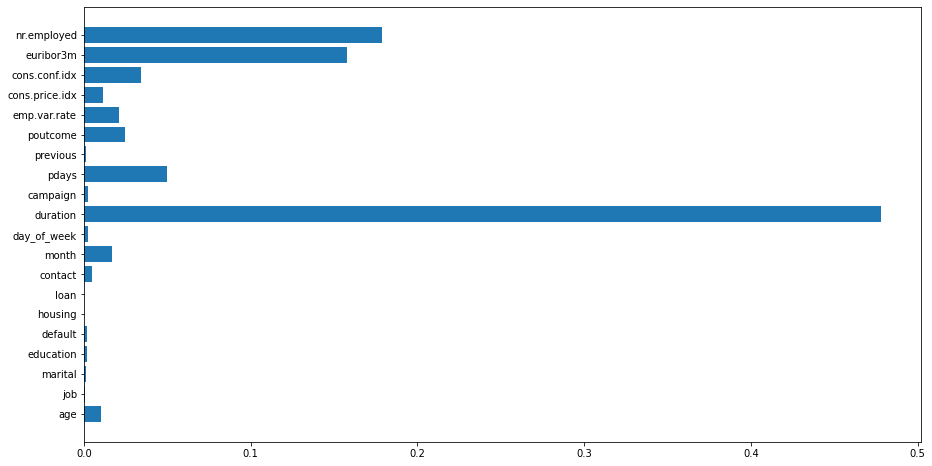

In [12]:
plt.figure(figsize=(15, 8))
plt.barh(y=X.columns,
         width=gbm.feature_importances_)
plt.show()

In [24]:
#{'classifier': 'RandomForest', 'rf_n_estimators': 618, 'rf_max_features': 0.7, 'rf_max_depth': 7}.
clean = df.copy()
clean1 = test.copy()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
col_names = ['duration','nr.employed']
features = clean[col_names]
features1 = clean1[col_names]
clean[col_names] = scaler.fit_transform(features.values)
clean1[col_names] = scaler.fit_transform(features1.values)
X = clean[clean.columns.drop('y')]
y = clean['y']
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=618, max_depth=7,max_features=0.7)
rf.fit(X,y)
result9 = rf.predict(clean1)
result9 = pd.DataFrame(result9)
result9['id'] = result9.index
result9.rename(columns = {0:'y'}, inplace = True)
result9.to_csv('submission9.csv',index=False)

In [20]:
from sklearn.neural_network import MLPClassifier
import time
mlp_gs = MLPClassifier(max_iter=150)
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,),(5,2),(7,1)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam','lbfgs'],
    'alpha': [0.05,1e-4, 0.001, 1e-2, 0.1, 1, 10, 100, 1000,10000],
    'learning_rate': ['constant','adaptive'],
}
clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)
start_time = time.time()
grid_result = clf.fit(X, y)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

<IPython.core.display.Javascript object>

Best: 0.908355 using {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'solver': 'adam'}
Execution time: 1780.1341800689697 ms


In [2]:
from lightgbm import LGBMClassifier

C:\Users\kvray\anaconda3\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\Users\kvray\anaconda3\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\Users\kvray\anaconda3\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)


In [23]:
#{'classifier': 'LightGBM', 'rf_n_estimators': 56, 'rf_max_features': 0.7, 'rf_max_depth': 22}
lgbm = LGBMClassifier(max_depth=22, n_estimators=56)
lgbm.fit(X,y)
result10 = lgbm.predict(clean1)
result10 = pd.DataFrame(result10)
result10['id'] = result10.index
result10.rename(columns = {0:'y'}, inplace = True)
result10.to_csv('submission10.csv',index=False)


In [ ]:
#{'classifier': 'LightGBM', 'rf_n_estimators': 56, 'rf_max_features': 0.7, 'rf_max_depth': 22}
lgbm = LGBMClassifier(max_depth=22, n_estimators=56)
lgbm.fit(X,y)
result10 = lgbm.predict(clean1)
result10 = pd.DataFrame(result10)
result10['id'] = result10.index
result10.rename(columns = {0:'y'}, inplace = True)
result10.to_csv('submission10.csv',index=False)

In [6]:
from xgboost import XGBClassifier

In [7]:
#{'n_estimators': 499, 
 #'max_depth': 12, 
# 'reg_alpha': 3, 
# 'reg_lambda': 0, 
# 'min_child_weight': 4, 
# 'gamma': 4, 'learning_rate': 0.027027066604850287, 'colsample_bytree': 0.59}
xgbm = XGBClassifier(n_estimators = 499, max_depth = 12, reg_alpha=3,reg_lambda=0,min_child_weight =4, gamma =4,
                     learning_rate = 0.027027066604850287, colsample_bytree= 0.59)
xgbm.fit(X,y)
result11 = xgbm.predict(test)
result11 = pd.DataFrame(result11)
result11['id'] = result11.index
result11.rename(columns = {0:'y'}, inplace = True)
result11.to_csv('submission11.csv',index=False)

In [17]:
#{'n_estimators': 278, 'max_depth': 24, 'reg_alpha': 4, 'reg_lambda': 0, 'min_child_weight': 1, 'gamma': 4, 'learning_rate': 0.059777468839317824}
xgbm1 = XGBClassifier(n_estimators = 278, max_depth = 24, reg_alpha=4,reg_lambda=0,min_child_weight =1, gamma =4,
                     learning_rate = 0.059777468839317824)
xgbm1.fit(X,y)
result12 = xgbm1.predict(test)
result12 = pd.DataFrame(result12)
result12['id'] = result12.index
result12.rename(columns = {0:'y'}, inplace = True)
result12.to_csv('submission12.csv',index=False)

In [19]:
#{'n_estimators': 296, 'max_depth': 6, 'reg_alpha': 4, 'reg_lambda': 2, 'min_child_weight': 2, 'gamma': 3, 'learning_rate': 0.21548481342927628}
xgbm2 = XGBClassifier(n_estimators = 296, max_depth = 6, reg_alpha=4,reg_lambda=2,min_child_weight =2, gamma =3,
                     learning_rate = 0.21548481342927628)
xgbm2.fit(X,y)
result13 = xgbm2.predict(test)
result13 = pd.DataFrame(result13)
result13['id'] = result13.index
result13.rename(columns = {0:'y'}, inplace = True)
result13.to_csv('submission13.csv',index=False)

In [20]:
#{'n_estimators': 726, 'max_depth': 20, 'reg_alpha': 5, 'reg_lambda': 3, 'min_child_weight': 3, 'gamma': 3, 'learning_rate': 0.11980502413765114}
xgbm3 = XGBClassifier(n_estimators = 726, max_depth = 20, reg_alpha=5,reg_lambda=3,min_child_weight =3, gamma =3,
                     learning_rate = 0.11980502413765114)
xgbm3.fit(X,y)
result14 = xgbm3.predict(test)
result14 = pd.DataFrame(result14)
result14['id'] = result14.index
result14.rename(columns = {0:'y'}, inplace = True)
result14.to_csv('submission14.csv',index=False)

In [27]:
!pip install dal

ERROR: Could not find a version that satisfies the requirement dal
ERROR: No matching distribution found for dal
